In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 
# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.coopative_learning_case import CooperativeRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler


In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"num_control": 7, "num_increment": 100})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    num_control  num_increment
0          7.0          100.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


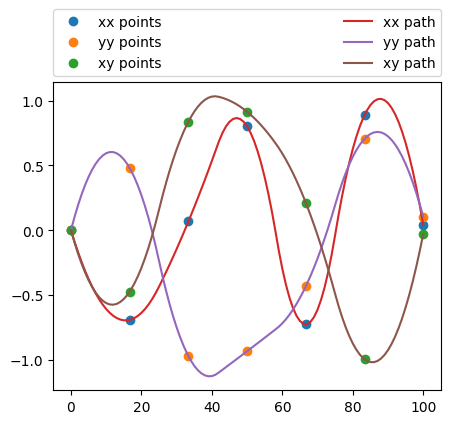

In [3]:
# initialize the strain path generator
strain_path_generator = StrainPathSampler(seed=12, num_dim=3)
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator.plot_path(iteration=0)

## Task 1 
- $v_{frac} = 0.45$
- $L=0.048$ 
- $R_{mu}=0.01$
- $R_{std}=0.003$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) yield criterion: $\sigma_{y} = 0.5+0.2\exp{(\bar\epsilon)}^{0.4}$
- fiber property \
(1) $E=10{MPa}$\
(2) $v=0.19$ 



In [4]:
simulation_wrapper = CooperativeRVE()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.3, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='linear', 
                                    yield_stress = 0.5,
                                    a=0.4,
                                    num_cpu=6,
                                    print_info=True) 


Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0.0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.504, 0.508, 0.512, 0.516, 0.52, 0.524, 0.528, 0.532, 0.536, 0.54, 0.544, 0.548, 0.552, 0.556, 0.56, 0.5640000000000001, 0.5680000000000001, 0.572, 0.5760000000000001, 0.5800000000000001, 0.584, 0.588, 0.592, 0.596, 0.6, 0.604, 0.608, 0.612, 0.616, 0.62, 0.624, 0.628, 0.632, 0.636, 0.64, 0.644, 0.648, 0.652, 0.656, 0.66, 0.664, 0.668, 0.672, 0.676, 0.68, 0.684, 0.6880000000000001, 0.692, 0.696, 0.7, 0.704, 0.708, 0.712, 0.716, 0.72, 0.724, 0.728, 0.732, 0.736, 0.74, 0.744, 0.748, 0.752, 0.756, 0.76, 0.764, 0.768, 0.772, 0.776, 0.78, 0.784, 0.788, 0.792, 0.796, 0.8, 0.804, 0.808, 0.812, 0.8160000000000001, 0.8200000000000001, 0.8240000000000001, 0.82

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s


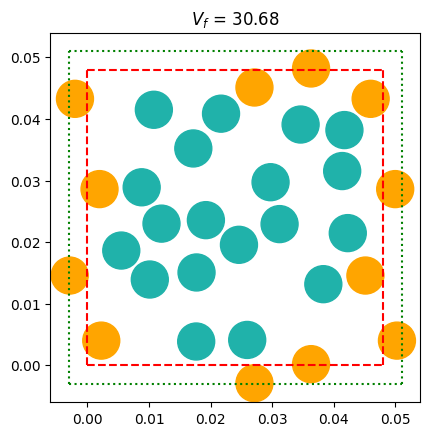

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


simulation time :40.007832 s
simulation time :60.020051 s
simulation time :80.020139 s
simulation time :100.020210 s
simulation time :120.020023 s
simulation time :140.020079 s
simulation time :160.020113 s
simulation time :180.020523 s
simulation time :200.020591 s
simulation time :220.020251 s
simulation time :240.021067 s
simulation time :260.020859 s
simulation time :280.020311 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 300.07733178138733
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


In [5]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_1.pickle') 

## Task 2

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.004$
- $R_{std}=0.002$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) yield criterion: $\sigma_{y} = 0.5+0.2\exp{(\bar\epsilon)}^{0.4}$
- fiber property\
(1) $E=1000{MPa}$\
(2) $v=0.19$ 


In [6]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.3, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    print_info=True) 


Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0.0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5792446596230557, 0.6045639552591273, 0.6229754742924681, 0.6379729661461215, 0.6508544084136291, 0.6622671111599604, 0.6725874532990042, 0.682056420302608, 0.6908389454809087, 0.6990535852767487, 0.7067888311395025, 0.7141127368338324, 0.7210789255640928, 0.7277305099281833, 0.7341027460023103, 0.7402248867962862, 0.7461215111265916, 0.7518134982456163, 0.7573187569288689, 0.7626527804403767, 0.7678290755153834, 0.7728594985480539, 0.7777545223286737, 0.7825234500494767, 0.7871745887492587, 0.7917153911869923, 0.796152572875223, 0.8004922093745831, 0.8047398177595422, 0.808900425283706, 0.8129786276126214, 0.8169786384922226, 0.8209043323389678, 0

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s


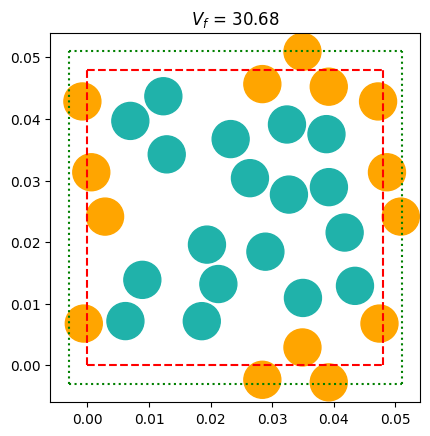

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<20 out of 30 licenses remain available>.


simulation time :40.008395 s
simulation time :60.016597 s
simulation time :80.016511 s
simulation time :100.016424 s
simulation time :120.016721 s
simulation time :140.016569 s
simulation time :160.020808 s
simulation time :180.017065 s
simulation time :200.016650 s
simulation time :220.016685 s
simulation time :240.016756 s
simulation time :260.016832 s
simulation time :280.017964 s
simulation time :300.017946 s
simulation time :320.016960 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 340.0763626098633
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.


In [8]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_2.pickle')

## Task 3

- $v_{frac} = 0.3$
- $L=0.048$ 
- $R_{mu}=0.003$
- $R_{std}=0$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) yield criterion: $\sigma_{y} = 0.5+0.2\exp{(\bar\epsilon)}^{0.4}$
- fiber property \  
(1) $E=100{MPa}$\
(2) $v=0.19$ 

In [4]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.3, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='ramberg', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    print_info=True) 


Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0.0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5062734570190611, 0.512593906055271, 0.5189614638594022, 0.5253762468935953, 0.5318383713334871, 0.5383479530703168, 0.5449051077130023, 0.5515099505901957, 0.5581625967523094, 0.564863160973523, 0.5716117577537604, 0.5784085013206498, 0.5852535056314538, 0.5921468843749835, 0.5990887509734836, 0.6060792185845016, 0.6131184001027299, 0.6202064081618314, 0.6273433551362393, 0.6345293531429418, 0.6417645140432402, 0.6490489494444931, 0.6563827707018358, 0.6637660889198846, 0.6711990149544181, 0.6786816594140436, 0.6862141326618417, 0.6937965448169948, 0.7014290057563961, 0.7091116251162435, 0.7168445122936137, 0.7246277764480188, 0.7324615265029497, 

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s


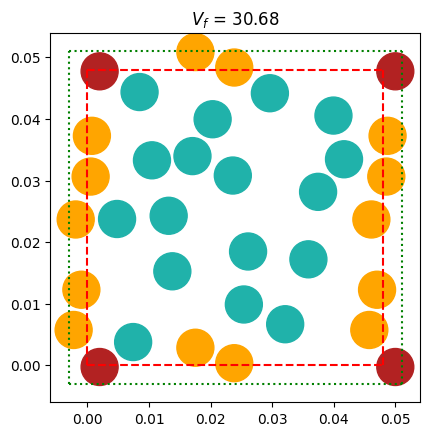

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


simulation time :40.008789 s
simulation time :60.017090 s
simulation time :80.016878 s
simulation time :100.017208 s
simulation time :120.017271 s
simulation time :140.017299 s
simulation time :160.017364 s
simulation time :180.017103 s
simulation time :200.017187 s
simulation time :220.017536 s
simulation time :240.017988 s
simulation time :260.017362 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 280.0839841365814
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


In [5]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_3.pickle')

# plot all results together 

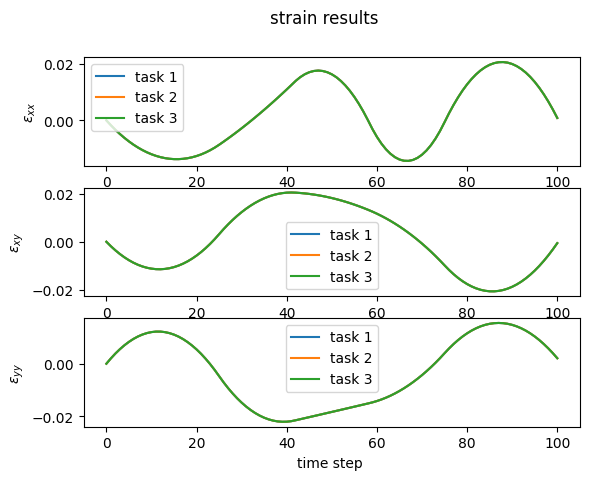

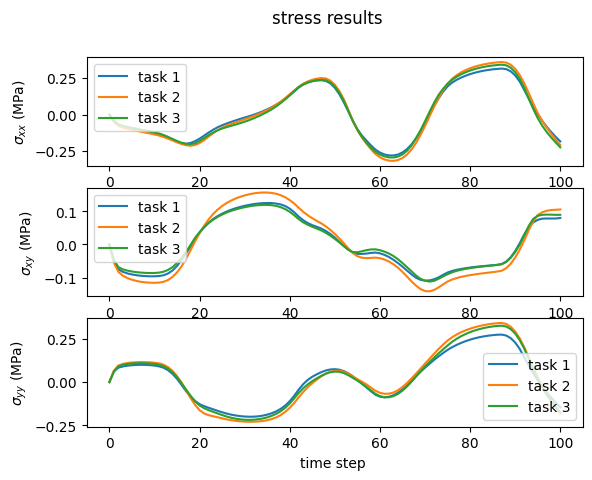

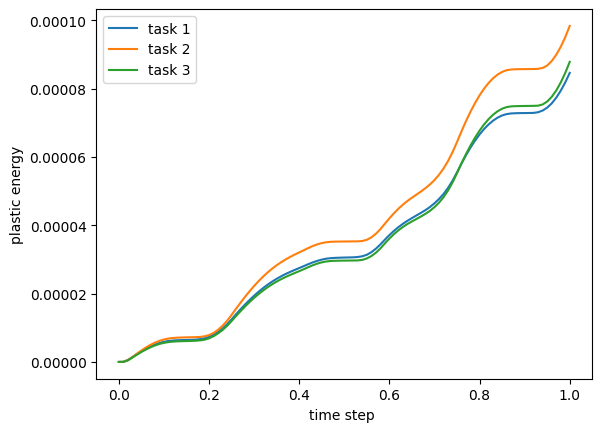

In [6]:
# os.chdir('Data/')
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
# with open("task_4.pickle", "rb") as fd:
#     benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
# results_4 =benchmark_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# # result of benchmark4
# stress_4 = results_4["stress"].iloc[0]
# strain_4 = results_4["strain"].iloc[0]
# plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(3,1)
ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
# ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
# ax[1].plot(strain_4[:, 0, 1], label="task 3")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
# ax[2].plot(strain_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(3,1)
ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
# ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
# ax[1].plot(stress_4[:, 1, 0], label="task 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
# ax[2].plot(stress_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
# ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)